**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [16]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle
#по умолчанию стоит метрика Минковского

class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self, n_neighbors):
        #super().__init__
        self.n_neighbors = n_neighbors
        
    def fit(self, X, y):
        self.X = np.array(X)
        arr = np.int64(y)
        self.y = arr
        self.classes = np.unique(arr)
        
    
    def predict(self, X):
        y_pred = self.predict_proba(X).argmax(axis = 1)
        return y_pred
        
    def predict_proba(self, X):
        #меряем расстония до всех элементов и выбираем k ближайших соседей
        #по умолчанию стоит расстояние минковского c параметром p = 2
        n_samples = X.shape[0]
        n_classes = self.classes.size
        y_pred = np.zeros((n_samples,n_classes))
        X_train = self.X
        X_tast = np.array(X)
        
        for (i,vector) in enumerate(X_tast):
            vect_of_dist = ((X_train - vector)**2).sum(axis = 1)
            vect_of_dist = vect_of_dist**0.5         
            neibors = np.argsort(vect_of_dist)[0:self.n_neighbors]
            #print self.y[neibors]
            
            for x in neibors:
                y_pred[i,self.y[x]] += 1.
            y_pred[i] = y_pred[i]/self.n_neighbors
            
        return y_pred    
            
    def score(self, X, y):       
        return float((self.predict(X) == y).sum()) / y.shape[0]

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.21 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 423 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.82 ms


array([1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 2, 2, 1])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 851 µs


array([1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 2, 2, 1])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.61 ms


array([[0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ]])

In [11]:
X_test.shape


(15, 4)

In [12]:
%time my_clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.01 ms


array([[0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ]])

In [13]:
clf.score(X_test, y_test)

0.8

In [14]:
my_clf.score(X_test, y_test)

0.8

17


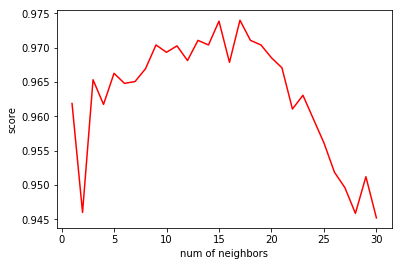

In [35]:
# Задание 3
neighbors_arr = np.arange(1,31)
n_try = 500
score_arr = list()
for x in neighbors_arr:
    score = 0
    for i in range(n_try):
        X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                            iris.target,
                                                            test_size=0.1,
                                                            stratify=iris.target)
        my_clf = MyKNeighborsClassifier(n_neighbors=x)
        my_clf.fit(X_train, y_train)
        score += my_clf.score(X_test, y_test)
    score_arr.append (score/n_try)

print np.argmax(score_arr) + 1
plt.figure()
plt.plot(neighbors_arr, score_arr, 'r')
plt.xlabel('num of neighbors')
plt.ylabel('score')
plt.show()

**MNIST**

In [46]:
mnist = fetch_mldata('MNIST original')

In [47]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [48]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [49]:
%time clf.fit(X_train, y_train)

CPU times: user 24.8 s, sys: 48 ms, total: 24.9 s
Wall time: 24.9 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [50]:
%time my_clf.fit(X_train, y_train)

CPU times: user 12 ms, sys: 8 ms, total: 20 ms
Wall time: 16.8 ms


In [1]:
%time clf.predict(X_test)

In [ ]:
%time my_clf.predict(X_test)

In [ ]:
%time clf.predict_proba(X_test)

In [ ]:
%time my_clf.predict_proba(X_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
my_clf.score(X_test, y_test)

Задание 5

In [ ]:
# seaborn - библиотека, базирующаяся на Matplotlib, но оптимизированная для визуализации статистических 
#           моделей. (тепловые карты, распределения, результаты математических операций)
#
# matplotlib - модуль для визуализации данных (позволяет использовать Python как MATLAB)
#
# train_test_split - функция для разделения данных на тренировочную и тестовую выборку
#
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - служит дл объединения нескольких действий 
#                                  (которые часто встречаются вместе или отдельно не используются) в одно
#
# StandardScaler (from sklearn.preprocessing import StandardScaler) - класс для нормализации данных,
#                приводит выборку к нулевому матожиданию и единичной дисперсии
#
# ClassifierMixin - базовый класс для классификаторов в sklearn
#
# NeighborsBase - базовый класс для kNN
#
# KNeighborsMixin - реализует поиск ближайших соседей
#
# SupervisedIntegerMixin - реализует fit